
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 - Latent Semantic Analysis <br>
<font color=696880 size=4>
Sina Namazi


____

## Personal Data

Please fill in your details below to help us keep track of your submission.

In [4]:
student_number = 401102789
first_name = 'Seyed Ali'
last_name = 'Vakilzadeh'
assert student_number and first_name and last_name is not None, 'pls input your information'

## Libraries

In [17]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk #to get the packages below

from scipy.linalg import svd
import matplotlib.pyplot as plt

nltk.download('stopwords') #to get the packages
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Linear Algebra Homework: Latent Semantic Analysis (LSA) with Singular Value Decomposition (SVD)

## Introduction

Latent Semantic Analysis (LSA) is a powerful technique in natural language processing and information retrieval that helps to uncover the underlying structure in a collection of texts. By using Singular Value Decomposition (SVD), LSA transforms high-dimensional textual data into a lower-dimensional space, capturing the most important patterns in the data.

### Objectives

In this homework, we will explore how LSA can be used to obtain vectors for words and documents, which can then be used for various tasks such as information retrieval, clustering, and semantic analysis. We will achieve this through the following steps:

1. **Preparing the Data**: We will start by gathering and preprocessing the text data to construct a term-document matrix.
2. **Singular Value Decomposition (SVD)**: We will apply SVD to the term-document matrix to obtain the latent semantic structure.
3. **Visualization**: Finally, we will visualize the word and document vectors to understand the relationships between them.

By the end of this homework, you will have a deeper understanding of how linear algebra concepts can be applied to real-world text data and gain practical experience with implementing LSA using Python.

Let's get started!


## Data Preparation

In this section, we will prepare our dataset for Latent Semantic Analysis (LSA). This involves loading the dataset, preprocessing the texts, and creating the term-document matrix.

### 1. Loading the Dataset

First, we will load a dataset of news articles along with their labels indicating whether they are relieble or not. This dataset will serve as the foundation for our analysis.

### 2. Preprocessing the Texts

To prepare the texts for analysis, we need to perform several preprocessing steps:

- **Tokenization**: Breaking down the text into individual words or tokens.
- **Removing Stopwords**: Filtering out common words that do not carry significant meaning (e.g., "and", "the", "is").
- **Lemmatization**: Reducing words to their base or root form (e.g., "running" to "run").

These steps will help us create a clean and meaningful representation of the text data.

### 3. Creating the Term-Document Matrix

Once the texts are preprocessed, we will construct a term-document matrix. This matrix will have terms (words) as rows and documents (texts) as columns. Each entry in the matrix will represent the frequency of a term in a document. This matrix will be the input for applying Singular Value Decomposition (SVD) in the next section.


### Loading the Dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive') #NOTE: SINCE I WAS WORKING IN GOOGLE COLLAB SPACE, I MOUNTED MY DRIVE SO THAT I WOULD HAVE ACCESS TO THIS FILE

df = pd.read_csv('/content/drive/My Drive/PR3/LSA/fake_news.csv')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                text  label
0  “For I delivered to you as of first importance...      0
1  WASHINGTON  —   President Trump sharply change...      0
2  Lightning struck twice at Baylor University’s ...      0
3  He did not mock. He did not scold. He did not ...      0
4  Three years ago, girls from the Hockey in Newa...      0


### Preprocessing the Texts

In [18]:
def preprocess_text(text):
    """
    Preprocess the input text by performing tokenization, stop words removal, and lemmatization.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text.
    """
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove stop words and lemmatize the tokens
    stop_words = stopwords.words('english')
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


#Applying the preprocess_text function to the 'text' column of the DataFrame
df = pd.read_csv('/content/drive/My Drive/PR3/LSA/fake_news.csv')
df['preprocessed_text'] = df['text'].apply(preprocess_text)


#Showing the first 5 rows of the dataset
print(df.head())



                                                text  label  \
0  “For I delivered to you as of first importance...      0   
1  WASHINGTON  —   President Trump sharply change...      0   
2  Lightning struck twice at Baylor University’s ...      0   
3  He did not mock. He did not scold. He did not ...      0   
4  Three years ago, girls from the Hockey in Newa...      0   

                                   preprocessed_text  
0  delivered first importance also received chris...  
1  washington president trump sharply changed fed...  
2  lightning struck twice baylor university renow...  
3  mock scold blunder instead donald j trump show...  
4  three year ago girl hockey newark youth progra...  


### Creating the Term-Document Matrix

In [20]:
#Creating the term-document matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

doc_mat = vectorizer.fit_transform(df['preprocessed_text'])

term_document_matrix = pd.DataFrame(doc_mat.toarray(), columns=vectorizer.get_feature_names_out())

print(term_document_matrix.head())


   aa  aaa  aaaand  aab  aada  aade  aadi  aadidura  aadmi  aadvantage  ...  \
0   0    0       0    0     0     0     0         0      0           0  ...   
1   0    0       0    0     0     0     0         0      0           0  ...   
2   0    0       0    0     0     0     0         0      0           0  ...   
3   0    0       0    0     0     0     0         0      0           0  ...   
4   0    0       0    0     0     0     0         0      0           0  ...   

   zwo  zwolennicy  zwolennikami  zwrocie  zwrotu  zwycistwo  zyaratgah  \
0    0           0             0        0       0          0          0   
1    0           0             0        0       0          0          0   
2    0           0             0        0       0          0          0   
3    0           0             0        0       0          0          0   
4    0           0             0        0       0          0          0   

   zygar  zylinderkopfdichtung  zytsov  
0      0                     0   

## Applying Singular Value Decomposition (SVD)

In this section, we will apply Singular Value Decomposition (SVD) to the term-document matrix to extract the latent semantic structure of the data. The right singular vectors obtained from SVD will be used as the embeddings for our documents.

### Singular Value Decomposition (SVD)

Singular Value Decomposition is a matrix factorization technique that decomposes a matrix $A$ into three matrices:

$$
A = U \Sigma V^T
$$

where:
- $U$ is an orthogonal matrix containing the left singular vectors.
- $\Sigma$ is a diagonal matrix containing the singular values.
- $V^T$ is the transpose of an orthogonal matrix containing the right singular vectors.

In the context of text data, the term-document matrix $A$ can be decomposed using SVD to reveal the underlying semantic structure.

### Extracting Document Embeddings

The right singular vectors obtained from the SVD are particularly useful for our analysis. These vectors, which are the columns of the matrix $V$, represent the documents in a reduced-dimensional semantic space. These document embeddings capture the essential features of the texts and can be used for various downstream tasks such as clustering, classification, and visualization.

By applying SVD to the term-document matrix, we will obtain a set of document embeddings that can be visualized and analyzed to gain insights into the relationships between different documents.


In [21]:
# TODO: Perform Singular Value Decomposition (SVD) on the term-document matrix (this might take a few minutes)
U, Sigma, VT = np.linalg.svd(term_document_matrix, full_matrices=False)

print(f"U shape: {U.shape}")
print(f"Sigma shape: {Sigma.shape}")
print(f"VT shape: {VT.shape}")

U shape: (4000, 4000)
Sigma shape: (4000,)
VT shape: (4000, 69330)


## Visualization

In this section, we will visualize the document embeddings obtained from Singular Value Decomposition (SVD). By plotting the first two singular vectors, we can create a 2D scatter plot of the documents. Each document will be colored based on its respective label (reliable or unreliable) to help us visually analyze the separation between different classes.

### 2D Embeddings

To visualize the document embeddings, we will use the first two right singular vectors obtained from SVD. These vectors correspond to the two largest singular values and capture the most significant features of the data.

### Scatter Plot

We will create a scatter plot where:
- Each point represents a document.
- The x-coordinate of a point corresponds to its first singular vector value.
- The y-coordinate of a point corresponds to its second singular vector value.
- The color of each point indicates whether the document is labeled as fake news or true news.

This visualization will allow us to see how well the SVD has separated the different classes of documents in a 2D space. It can also provide insights into the structure and distribution of the documents based on their latent semantic features.


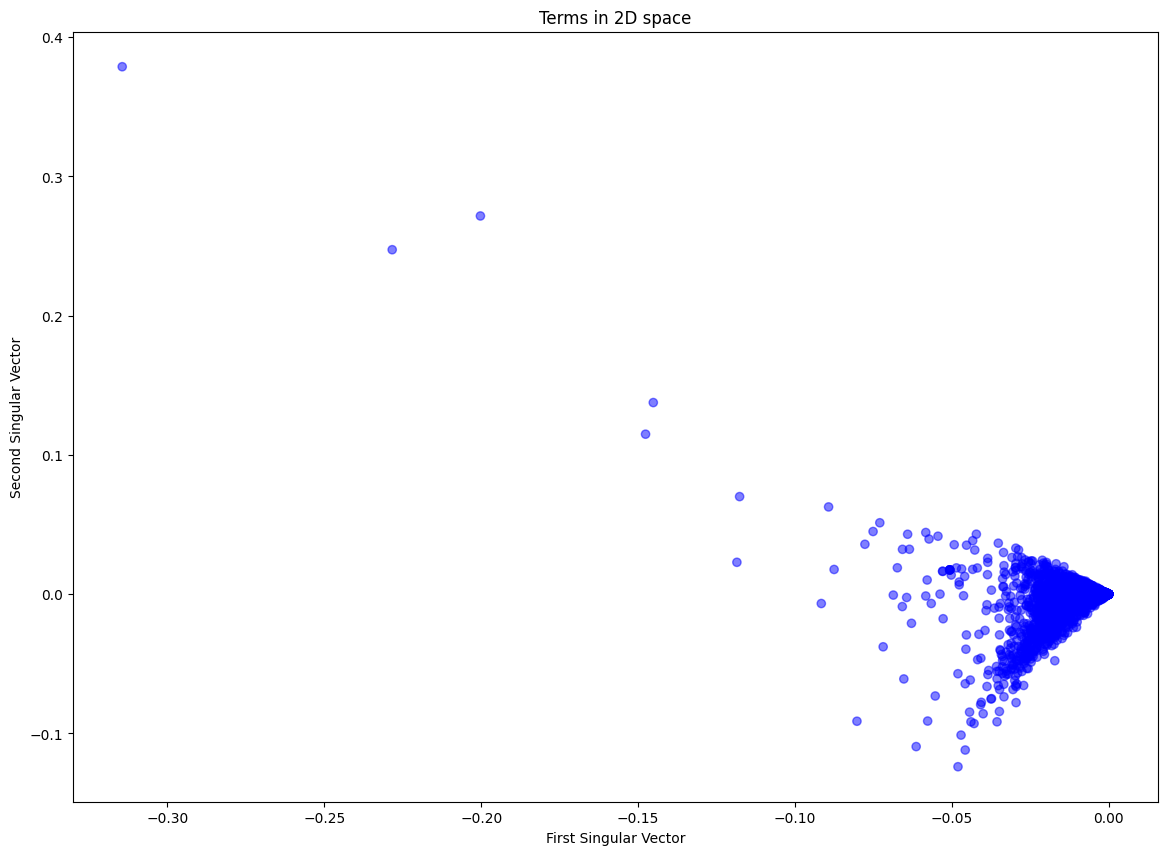

In [23]:
# TODO: Plot the terms in the 2D space

x_term = U[:, 0]
y_term = U[:, 1]

plt.figure(figsize=(14, 10))

colors = ['green' if label == 'reliable' else 'blue' for label in df['label']]

plt.scatter(x_term, y_term, c=colors, alpha=0.5)

plt.xlabel('First Singular Vector')
plt.ylabel('Second Singular Vector')
plt.title('Terms in 2D space')
plt.show()

## Conclusion

In this homework, we explored the use of Latent Semantic Analysis (LSA) with Singular Value Decomposition (SVD) to obtain word and document vectors from a dataset of texts labeled as fake news or true news. We went through the steps of loading and preprocessing the data, applying SVD, and visualizing the document embeddings in a 2D space.

### Answer these questions:

1. **Why do you think reliable and unreliable news separated without using sample labels?**

we performed such separation by using the difference of the texts in the different articles, and distinguishing the 'fake' news by their offset from what most of our sample suggests; all of which done by using LSA to identify the text patterns and later on calculating the distant of different patterns (variance) from the most common spread patterns. the final separation was done using the SVD method.

2. **What do the left singular vectors mean?**

left singular vectors, which are described using matrice U in SVD, are -in our example- indicators of the relation between each of our terms and the reduced-dimensional space which consists of the relavant charachteristics of our data. columns of matrice U are our documents, and the rows measure the relativity of them to a certain term.
As a result, we store the important features of data using a lower dimension. This technique can help when visualizing, classifying or when performing other tasks which require getting information from a high-dimensional space.
